# ASSIGNMENT 2: Regression and Classification
Group 15:
- Neha Devi Shakya: 12h [gusshakne@student.gu.se](gusshakne@student.gu.se)
- Sarvesh Meenowa: 12h [gusmeesa@student.gu.se](gusmeesa@student.gu.se)

In [1]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', size = 12) # set plot font size

import seaborn as sns
# sns.set_theme() # set theme
sns.set(font_scale = 1.2)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.datasets import load_iris

from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import math
from sklearn import datasets

## The dataset associated to this assignment was downloaded from [www.hemnet.se](www.hemnet.se) on 2020-10-18. The data contains information about selling prices of villas in Landvetter that were sold in the past 12 months. [4p]

In [3]:
# load the dataset
housing_data = pd.read_csv("/content/drive/Shareddrives/Introduction to data science/Assignment 2/Datasets/data_assignment2-1.csv")
# get a peek
housing_data.head()

,ID,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
0,1,104,5.0,271.0,25.0,33,4600000
1,2,99,5.0,1506.0,6.0,88,4450000
2,3,133,6.0,486.0,NaN,44,4900000
3,4,175,7.0,728.0,NaN,14,6625000
4,5,118,6.0,1506.0,NaN,29,4600000


In [4]:
# check for missing values
housing_data.isnull().sum()

ID                0
Living_area       0
Rooms             2
Land_size         1
Biarea           24
Age               0
Selling_price     0
dtype: int64

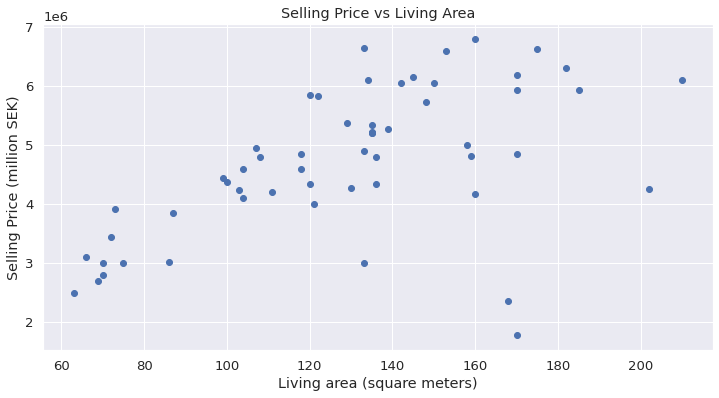

In [5]:
# plot selling price vs living area

# set plot size
plt.figure(figsize = (12, 6))

# create scatter plot
plt.scatter(x = housing_data["Living_area"], y = housing_data["Selling_price"])

# add title and axis labels
plt.title("Selling Price vs Living Area")
plt.xlabel("Living area (square meters)")
plt.ylabel("Selling Price (million SEK)")
plt.show()

### a. Find a linear regression model that relates the living area to the selling price. If you did any data cleaning step(s), describe and explain why you did that.

In [6]:
# create x and y
feature_cols = "Living_area"
x = housing_data[feature_cols].values.reshape(-1,1) # predictor
y = housing_data["Selling_price"].values.reshape(-1,1) # response

In [7]:
# # split data into train and test
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
# # the test set will be 20% of the whole data set

In [8]:
# create and train the model
linear_model = LinearRegression().fit(x, y)

In [9]:
# generate prediction
y_pred = linear_model.predict(x)

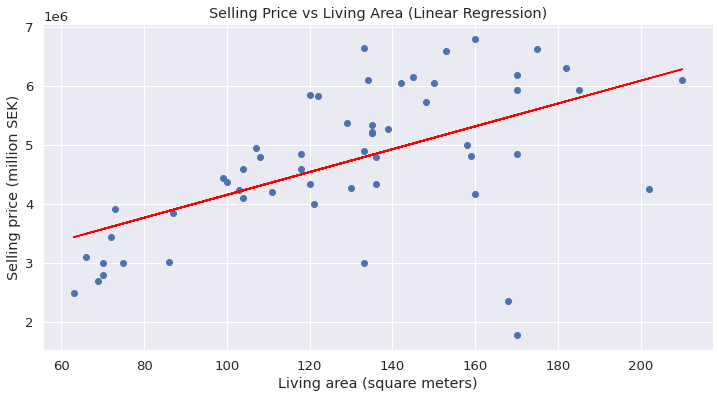

In [10]:
# plot regression line together with scatter plot

# set plot size
plt.figure(figsize = (12, 6))

# create scatter plot
plt.scatter(x, y)

# add regression line
plt.plot(x, y_pred, color='red')

# add title and labels
plt.title("Selling Price vs Living Area (Linear Regression)")
plt.xlabel("Living area (square meters)")
plt.ylabel("Selling price (million SEK)")

plt.show()

### b. What are the values of the slope and intercept of the regression line?

In [11]:
# get slope of regression line
slope = linear_model.coef_

# get intercept of regression line
intercept = linear_model.intercept_

print(f"Slope: {int(slope)} (SEK/m2)")
print(f"Intercept: {int(intercept)} (SEK/m2)")

Slope: 19370 (SEK/m2)
Intercept: 2220603 (SEK/m2)


### c. Use this model to predict the selling prices of houses which have living area 100 m2, 150 m2 and 200 m2.

In [12]:
# values to predict for (100, 150, 200)
x_test = np.array([100,150,200]).reshape(-1,1)

# calculate prediction
predicted_values = linear_model.predict(x_test)

# calculate and print the prediction
for i, area in enumerate(x_test):
    print(f"Predicted price for house with living area {int(area)} m2: {float(predicted_values[i])} SEK")

Predicted price for house with living area 100 m2: 4157617.0980890263 SEK
Predicted price for house with living area 150 m2: 5126124.025455605 SEK
Predicted price for house with living area 200 m2: 6094630.952822184 SEK


### d. Draw a residual plot.

In [13]:
# calculate residuals
residuals = y - y_pred

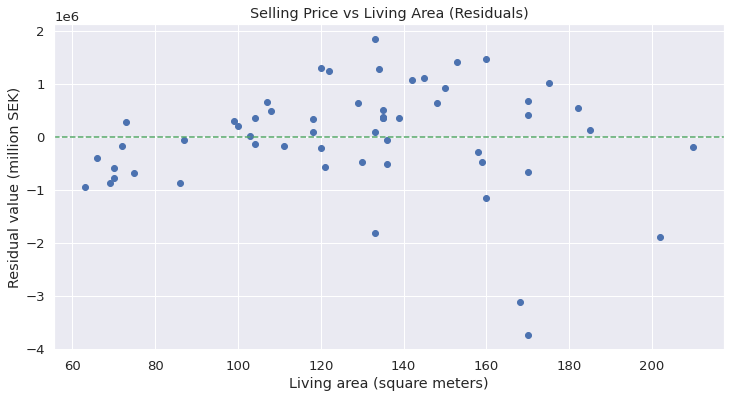

In [14]:
# plot scatter plot with residual line

# set plot size
plt.figure(figsize = (12, 6))

# create scatter plot
plt.scatter(x, residuals)

# add residual line
plt.axhline(y = 0, color = "g", linestyle = "dashed")

# add title and labels
plt.title("Selling Price vs Living Area (Residuals)")
plt.xlabel("Living area (square meters)")
plt.ylabel("Residual value (million SEK)")
plt.show()

### e. Discuss the results, and how the model could be improved.

Linear regression seeks to quantify the relationship between one or more predictor variables and response variables by determining the least-squares regression line, the line that best "fits" the data. This line generates a prediction for each observation in the dataset; however, it is improbable that the regression line's prediction will match the actual value perfectly. The residual is the difference between the predicted and the observed value. The residuals for each observation would be the vertical distance between the observation and the regression line if we plotted the observed values and overlaid the fitted regression line.

The residuals are used to test the assumption of homoscedasticity, which states that the residuals have constant variance at all levels of x. If this is not the case, the residuals are heteroscedastic. To see if this assumption is met, we may generate a residual plot, which is a scatterplot that shows the residuals versus the anticipated values of the model. If the residuals in the plot are relatively uniformly distributed around 0 with no discernible pattern, the assumption of homoscedasticity is said to be met.

Most data points in our figure are not centred at zero and have a high variance (i.e. spread) in the residuals, indicating heteroscedasticity. As a result, we can conclude that linear regression is not the best model for this data. It could be more fitting to alter the regression line to a higher degree or a different kind of model such as random forest.

However, these residual points are most likely influenced by the outliers in the given dataset. The linear regression might have had a better match if we omitted outliers. On the other hand, the "outliers" could be a regular transactions. Since we do not consider other variables such as age, condition of the house, and so o, we cannot explicitly say which data points are outliers (in terms of the selling price).

For these reasons, this model may not be optimal to forecast future selling prices. Even if a linear regression fits this data, the residual plot above shows that there is still a large variance. Furthermore, there is no perfect correlation between the selling price and living area because more factors influence the selling price than just the living area.

We could also improve the model's ability to forecast the price by including more independent factors. As a result, variables such as age, land size, and biarea (areas not included in living areas such as balconies) that significantly impact price could be incorporated into the model. Since we only have 56 data points while adding variables, we must limit our variables because models trained on numerous variables and limited quantities of data have a higher chance to be overfitted.

## 2. In this question, you will use the Iris data set (“from sklearn.datasets import load_iris”). [4.5p]

In [15]:
# load the iris dataset
iris_df = load_iris()

### a. Use a confusion matrix to evaluate the use of logistic regression to classify the iris data set.

In [16]:
# Split the data set into train data and test data into 80-20
x_train, x_test, y_train, y_test = train_test_split(iris_df.data, iris_df.target, test_size = 0.20, random_state = 0)

In [17]:
# Train a logistic regression model with the given train data
logistic_model = LogisticRegression(multi_class="ovr", solver="liblinear").fit(x_train, y_train)

In [18]:
# predict the test data
predictions = logistic_model.predict(x_test)

# calculate the model accuracy score
score = logistic_model.score(x_test, y_test)

In [19]:
# get labels for confusion matrix
labels = iris_df.target_names

# calculate confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)

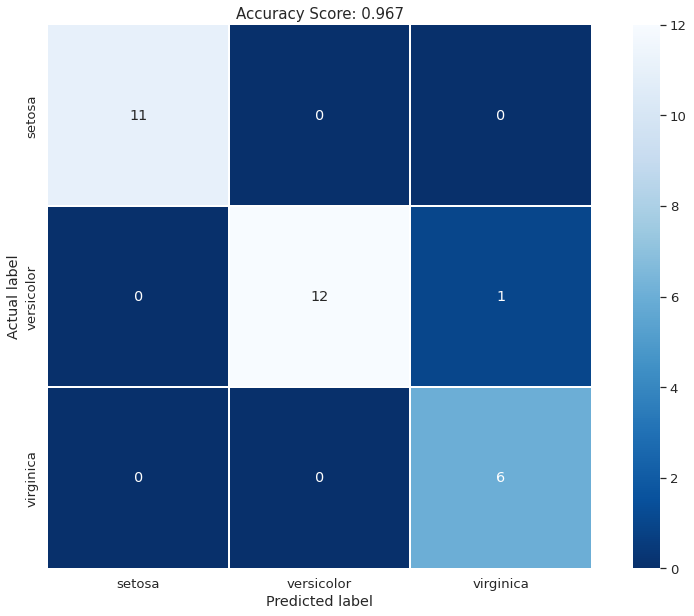

In [20]:
# plot confusion matrix

# set plot size
plt.figure(figsize = (15, 10))

fig = sns.heatmap(cm, annot = True, fmt = "d", linewidths = .5, square = True, cmap = "Blues_r")

# add plot title and axis labels
all_sample_title = "Accuracy Score: %.3f" % score
fig.set_title(all_sample_title, size = 15)
fig.set_xlabel("Predicted label")
fig.set_ylabel("Actual label")

## add tick labels - list must be in alphabetical order
fig.xaxis.set_ticklabels(labels)
fig.yaxis.set_ticklabels(labels)

plt.show()

> The logistic regression model performs very well on test set(unseen data) with an accuracy score of 0.967, it only misclassified 1 class wrongly that is it predicted the class virginica instead of versicolor class.

### b. Use k-nearest neighbours to classify the iris data set with some different values for k, and with uniform and distance-based weights. 

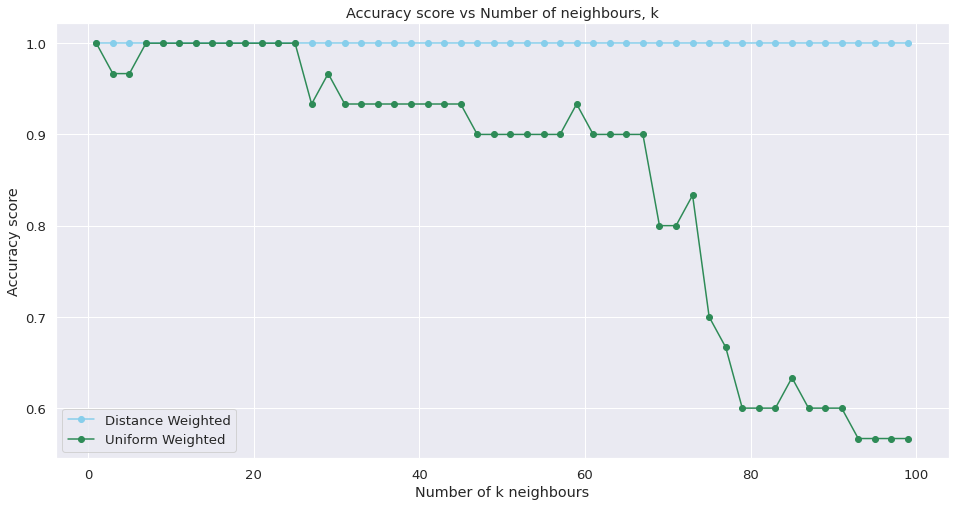

In [21]:
plt.figure(figsize = (16, 8))
k_values = list(range(1, 100, 2))
uni_accuracy = []
dist_accuracy =[]

weights = ["distance", "uniform"]
for weight in weights:
    accuracy = []
    for k in k_values:
        #Instantiate and train the model
        neigh = KNeighborsClassifier(n_neighbors = k, weights = weight).fit(x_train, y_train)

        #create predictions
        y_pred = neigh.predict(x_test)
        accuracy.append(metrics.accuracy_score(y_test, y_pred))
    if weight == "distance" :
      #dist_score.append(accuracy_score(y_test, y_pred))
      line1 = plt.plot(k_values, accuracy, label = "Distance Weighted", color = "skyblue", marker = "o", markerfacecolor = "skyblue") 
    else :
      #uni_score.append(accuracy_score(y_test, y_pred))
      line2 = plt.plot(k_values, accuracy, label = "Uniform Weighted", color = "seagreen", marker = "o", markerfacecolor = "seagreen")

plt.title("Accuracy score vs Number of neighbours, k") # Title
plt.xlabel("Number of k neighbours") # Label x-axis
plt.ylabel("Accuracy score") # Label y-axis
plt.legend() # Show plot labels as legend
plt.grid(True)

      

We plotted the accuracy scores against the number of k neighbours for each type of weight: distance and uniform. We used an odd number of k neighbours for each increment (in the range of 1-100) to avoid ties.

**What will happen when k grows larger for the different cases?**
> For **uniform weights**: As the value of K increases, accuracy scores decrease.

> For **distance weights**: The accuracy scores remain constant when k grows larger.


**Why?**
>  Using uniform weights and resulting in a drop in accuracy seems to be valid. As K grows larger, the value of k approaches the size of the dataset, which will lead to underfitting as all the data points will be classified in the same way.

> On the other hand, using distance weights, the accuracy scores remain constant at the highest possible score of 1.0, this is because closer neighbours of a query point will have a greater influence than neighbours which are further away and even by increasing k by a lot, solely the closest points will matter hence keeping the accuracy constantly high.

### c. Compare the classification models for the iris data set that are generated by k-nearest neighbours (for the different settings from question 2b) and by logistic regression. Calculate confusion matrices for these models and discuss the performance of the various models.

We tried to plot the confusion matrices 
with few particular number of k neighbours(3, 6, 25, 50, 100) for each type of weight.

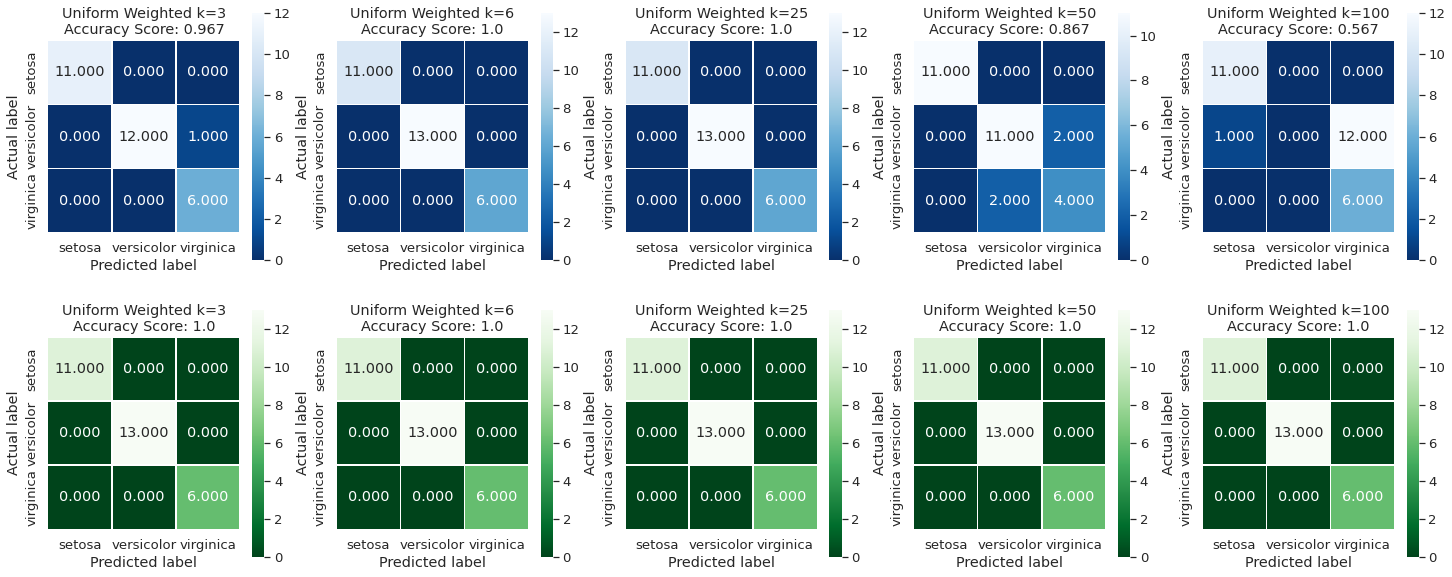

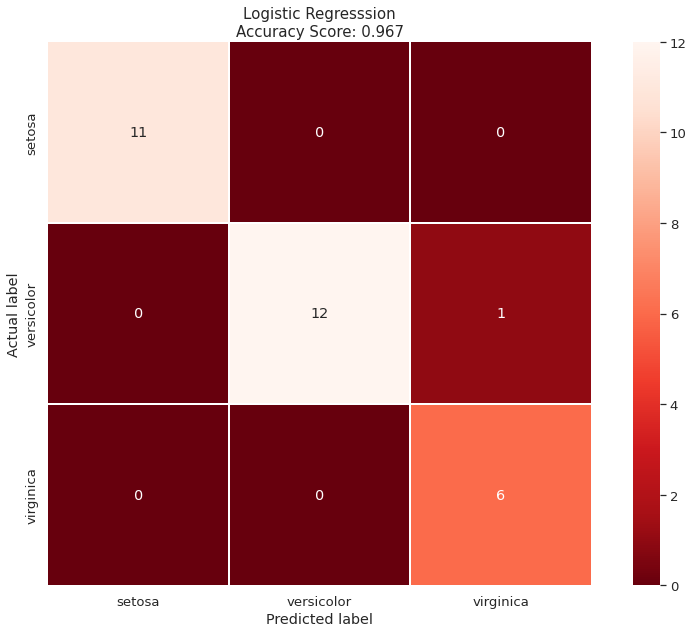

In [22]:
#create 5 subplots for each distance weights
fig, axs = plt.subplots(2, 5, sharex = False, sharey = False, figsize = (25, 10))

#Take few instances of k from the above plot

k = [3, 6, 25, 50, 100]
weights = ["uniform","distance"]
for w in weights : 
  #Compacting the code for populating the three subplots with confusion matrices
  for i in range(len(k)):
      knn = KNeighborsClassifier(n_neighbors=k[i], weights = w).fit(x_train, y_train)
      y_pred = knn.predict(x_test)
      acc = metrics.accuracy_score(y_test, y_pred)

      cm = metrics.confusion_matrix(y_test, y_pred)
      if w == "uniform":
        sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = "Blues_r", xticklabels = iris_df.target_names, yticklabels = iris_df.target_names, ax = axs[0, i]);
        axs[0, i].set(xlabel = "Predicted label", ylabel = "Actual label", title = f"Uniform Weighted k={k[i]}\nAccuracy Score: {round(acc, 3)}");
      else :
        sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = "Greens_r", xticklabels = iris_df.target_names, yticklabels = iris_df.target_names, ax = axs[1, i]);
        axs[1, i].set(xlabel = "Predicted label", ylabel = "Actual label", title = f"Uniform Weighted k={k[i]}\nAccuracy Score: {round(acc, 3)}");

fig.show();

# predict the test data
predictions = logistic_model.predict(x_test)

# calculate the model accuracy score
score = logistic_model.score(x_test, y_test)
# get labels for confusion matrix
labels = iris_df.target_names

# calculate confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)


# set plot size
plt.figure(figsize = (15, 10))

fig = sns.heatmap(cm, annot = True, fmt = "d", linewidths = .5, square = True, cmap = "Reds_r")

# add plot title and axis labels
all_sample_title = "Logistic Regresssion\nAccuracy Score: %.3f" % score
fig.set_title(all_sample_title, size = 15)
fig.set_xlabel("Predicted label")
fig.set_ylabel("Actual label")

## add tick labels - list must be in alphabetical order
fig.xaxis.set_ticklabels(labels)
fig.yaxis.set_ticklabels(labels)
plt.show()


> For all k values, distance-weighted KNN has performed better than uniform-weighted KNN and logistic regression. Even the uniform-weighted KNN has performed equally or better than logistic regression for k-values 3, 6 and 25. However, as the k grows larger, for example, at k = 50 and k = 100, the uniform-weighted KNN model performs worse than the logistic regression model.

> In this example, we can conclude that the KNN model can perform better or worse than the logistic model depending on the choice of weights (Distance or Uniform) and the K-values. However, we cannot generalise this conclusion since we have not tuned the logistic regression model. For instance, if we perform hyperparameter tuning on the logistic regression model, we may get 100% accuracy as well.

## 3. Explain why it is important to use a separate test (and sometimes validation) set. [1.5p]

The algorithm is built using training data, and it is then tested using test data to get an unbiased estimate of the final model performance. However, if the model is trained on the exact data used for testing, the algorithm would already knows how to interpret the data as it has been instructed to do so. Assume the algorithm was taught to identify the data point (2, 0, 1, 2) as a Versicolor; then, when the algorithm is tested with the same data point, it understands what it is because it was taught on it during the training phase. The goal of the test data is to see how well the model works on unseen data, which cannot be done if the test data used for evaluation has already been incorporated and observed by the model.

We use a validation set to fine-tune the model to behave as expected and should be kept separate from test data. The validation can be viewed as a first test of how the model acts for unknown data so that the model can be updated based on the validation data was handled and is performed in between training sessions. Although the model does not directly learn from the validation data, the model can be changed based on the validation outcomes and can indirectly impact the model's design. Validation data should also be isolated from training data because validation data should be entirely new data evaluating how the algorithm handles previously unseen data.